In [76]:
import pandas as pd
import plotly


In [77]:

#read with pandas all the csv file in ./data/train/group0
df0= pd.read_csv('../data/train/group0/dataset_user_0_train.csv', sep=';')
df1= pd.read_csv('../data/train/group0/dataset_user_9_train.csv', sep=';')
df18= pd.read_csv('../data/train/group0/dataset_user_18_train.csv', sep=';')
df27= pd.read_csv('../data/train/group0/dataset_user_27_train.csv', sep=';')
df36= pd.read_csv('../data/train/group0/dataset_user_36_train.csv', sep=';')


#print of the single value of the firrst row of df0
print(df18.iloc[1])


Unnamed: 0                                                                               1
day                                                                                      1
label                                                                                   64
hr_maxHeartRate                                                                        101
hr_minHeartRate                                                                         45
hr_restingHeartRate                                                                     47
hr_lastSevenDaysAvgRestingHeartRate                                                     65
hr_time_series                           [None, 80, 66, 55, 55, 52, 57, 60, 59, 51, 55,...
resp_lowestRespirationValue                                                            6.0
resp_highestRespirationValue                                                          19.0
resp_avgWakingRespirationValue                                                        13.0

Sezione Heart Rate (hr_)

hr_maxHeartRate

→ La frequenza cardiaca massima registrata durante la giornata.
ES: 114 bpm.

hr_minHeartRate

→ La frequenza cardiaca minima registrata durante la giornata.
ES: 39 bpm.

hr_restingHeartRate

→ La frequenza cardiaca a riposo che Garmin stima per quel giorno.
È una media basata su momenti di bassa attività e sonno.
ES: 40 bpm → ottimo livello di fitness.

hr_lastSevenDaysAvgRestingHeartRate

→ La media della FC a riposo degli ultimi 7 giorni.
ES: 49 bpm.

hr_time_series

→ Una lista (array) con la frequenza cardiaca misurata a intervalli regolari (tipicamente 1 minuto).
ES: [55, 51, 46, 47, ...].
È la serie del giorno, utile per analisi dettagliate (picchi, trend, stres ... )

Respirazione (resp_)

resp_lowestRespirationValue

→ Minimo valore di respirazione (atti/minuto) durante la giornata (spesso durante il sonno).
ES: 7 atti/min (valore normale in sonno profondo).

resp_highestRespirationValue

→ Massimo valore della respirazione nella giornata.
ES: 20 atti/min (normale in veglia o lieve attività).

resp_avgWakingRespirationValue

→ Respirazione media durante le ore di veglia.
ES: 13 atti/min.
Significa che, quando eri sveglio, respiravi in media 13 volte al minuto, valore normale per un adulto a riposo.

resp_avgSleepRespirationValue

→ Respirazione media durante il sonno.
ES: 13 atti/min.
Valore coerente con la respirazione normale notturna (di solito 12–18 atti/min).

resp_avgTomorrowSleepRespirationValue

→ Stima predittiva della respirazione media per la notte successiva, basata sul trend degli ultimi giorni.
ES: 12 atti/min.
Serve per anticipare lo stato fisiologico e eventuali anomalie.

resp_time_series

→ Serie temporale della respirazione a intervalli regolari durante il giorno
ES: [16.0, 14.0, 15.0, …]
Può essere usata per analizzare pattern di respirazione, picchi o apnea, oppure correlata ad attività e stress.

Attività (act_)

act_totalCalories

→ Calorie totali della giornata (basali + attività).
ES: 2543 kcal.

act_activeKilocalories

→ Calorie bruciate solo con l’attività fisica.
ES: 321 kcal.

act_distance

→ Distanza totale percorsa, di solito in metri.
ES: 6411 m → 6,4 km.

act_activeTime

→ Tempo attivo (minuti di attività significativa).
Se è NaN, quindi il dispositivo non l’ha rilevato o non lo espone via API.

Sonno (sleep_)
sleep_averageRespirationValue

→ Respirazione media durante il sonno.
es: 13 atti/min.

sleep_lowestRespirationValue

→ Minimo valore durante il sonno.
es: 7 atti/min (tipico del sonno profondo).

sleep_highestRespirationValue

→ Massimo valore durante il sonno.
es: 18 atti/min (fase REM o micro-risvegli).

sleep_awakeCount

→ Numero di risvegli rilevati durante la notte.
es: 0, Garmin spesso indica 0 quando i risvegli non superano una certa soglia.

sleep_avgSleepStress

→ Valore medio di “stress del sonno” basato su HRV e qualità del sonno.
Scala: più alto → più stress.
es: 6, valore basso → buona qualità del sonno.

sleep_avgHeartRate

→ Frequenza cardiaca media durante il sonno.
es: 47 bpm.


sleep_sleepTimeSeconds

→ Tempo totale di sonno registrato nella notte, in secondi.
Qui: 23.040 s → 6h 24min.
Include sonno profondo, leggero e REM, ma non i pisolini diurni.

sleep_napTimeSeconds

→ Durata dei pisolini diurni, in secondi.
Qui: 0 s → nessun pisolino registrato.

sleep_unmeasurableSleepSeconds

→ Tempo in cui il dispositivo non è riuscito a misurare il sonno, ad esempio a causa di rimozione o mancato contatto.
Qui: 0 s → tutti i dati del sonno sono stati registrati correttamente.

sleep_deepSleepSeconds

→ Tempo trascorso in sonno profondo, in secondi.
Qui: 3.720 s → 1h 2min.
Il sonno profondo è importante per recupero fisico e consolidamento della memoria.

sleep_lightSleepSeconds

→ Tempo trascorso in sonno leggero, in secondi.
Qui: 12.300 s → 3h 25min.
Il sonno leggero è la parte più abbondante del sonno e prepara il corpo alle fasi più profonde.

sleep_remSleepSeconds

→ Tempo trascorso in sonno REM, in secondi.
Qui: 7.020 s → 1h 57min.
La fase REM è fondamentale per l’elaborazione emotiva, la memoria e il sogno.

sleep_awakeSleepSeconds

→ Tempo passato svegli durante la notte, in secondi.
Qui: 120 s → 2 min.
Piccoli risvegli sono normali e spesso non ricordati.

day e label

day

→ È tipicamente un indice del giorno nella serie temporale (0 = primo giorno).

label
→ Indica un punteggio da 0 a 100 che valuta la qualità del sonno


In [78]:
import ast

lst_hr_time_series = ast.literal_eval(df0.iloc[0]['hr_time_series'])
lst_resp_time_series = ast.literal_eval(df0.iloc[0]['resp_time_series'])
lst_stress_time_series = ast.literal_eval(df0.iloc[0]['stress_time_series'])

print(len(lst_hr_time_series))
print(len(lst_resp_time_series))
print(len(lst_stress_time_series))


702
720
480


In [79]:
#plot the hr_time_series of the first row of df0
import plotly.express as px
import ast

# Convert the string representation of the list into an actual list of integers

# Create a simple DataFrame for plotting
df_plot = pd.DataFrame({
    'time': range(len(lst_hr_time_series)),
    'heart_rate': lst_hr_time_series
})

# Plot using Plotly Express
px.line(df_plot, x='time', y='heart_rate', title='Heart Rate Time Series').show()

#plot the resp_time_series of the first row of df0
df_plot_resp = pd.DataFrame({
    'time': range(len(lst_resp_time_series)),
    'respiration_rate': lst_resp_time_series
})
px.line(df_plot_resp, x='time', y='respiration_rate', title='Respiration Rate Time Series').show()
#plot the stress_time_series of the first row of df0
df_plot_stress = pd.DataFrame({
    'time': range(len(lst_stress_time_series)),
    'stress_level': lst_stress_time_series
})
px.line(df_plot_stress, x='time', y='stress_level', title='Stress Level Time Series').show()


In [80]:
#apply fourier transform to the hr_time_series of the first row of df0 and plot the result
import numpy as np
from numpy.fft import fft, ifft, fftfreq

hr_array = np.array(lst_hr_time_series, dtype=float)
hr_array = hr_array[~np.isnan(hr_array)]

resp_array = np.array(lst_resp_time_series, dtype=float)
resp_array = resp_array[resp_array >= 0]

stress_array = np.array(lst_stress_time_series, dtype=float)
stress_array = stress_array[stress_array >= 0]



n_hr = len(hr_array)
n_resp = len(resp_array)
n_stress = len(stress_array)


hr_fft = fft(hr_array)
resp_fft = fft(resp_array)
stress_fft = fft(stress_array)

hr_freq = fftfreq(n_hr)
resp_freq = fftfreq(n_resp)
stress_freq = fftfreq(n_stress)

hr_cuttoff = int( 0.05 * n_hr)
resp_cuttoff = int( 0.05 * n_resp)
stress_cuttoff = int( 0.07 * n_stress)

filtered_hr_fft = np.copy(hr_fft)
filtered_hr_fft[hr_cuttoff:-hr_cuttoff] = 0 # Zero out high frequency components

filtered_resp_fft = np.copy(resp_fft)
filtered_resp_fft[resp_cuttoff:-resp_cuttoff] = 0 # Zero out high frequency components

filtered_stress_fft = np.copy(stress_fft)
filtered_stress_fft[stress_cuttoff:-stress_cuttoff] = 0 # Zero out high frequency components

filtered_hr = np.real(ifft(filtered_hr_fft))
filtered_resp = np.real(ifft(filtered_resp_fft))
filtered_stress = np.real(ifft(filtered_stress_fft))



Text(0.5, 1.0, 'Stress Signal - Original vs Filtered')

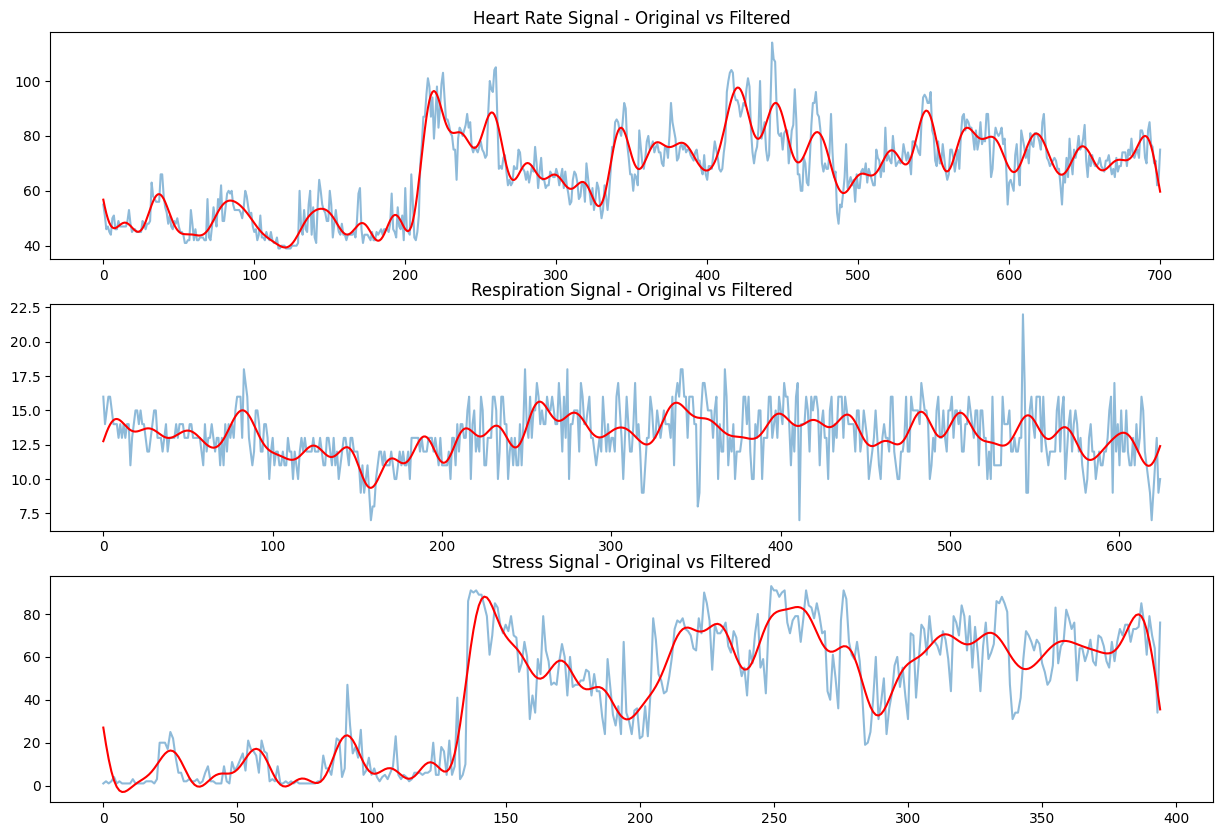

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(hr_array, label='Original HR Signal', alpha=0.5)
plt.plot(filtered_hr, label='Filtered HR Signal', color='red')
plt.title('Heart Rate Signal - Original vs Filtered')

plt.subplot(3, 1, 2)
plt.plot(resp_array, label='Original Respiration Signal', alpha=0.5)
plt.plot(filtered_resp, label='Filtered Respiration Signal', color='red')
plt.title('Respiration Signal - Original vs Filtered')

plt.subplot(3, 1, 3)
plt.plot(stress_array, label='Original Stress Signal', alpha=0.5)
plt.plot(filtered_stress, label='Filtered Stress Signal', color='red')
plt.title('Stress Signal - Original vs Filtered')